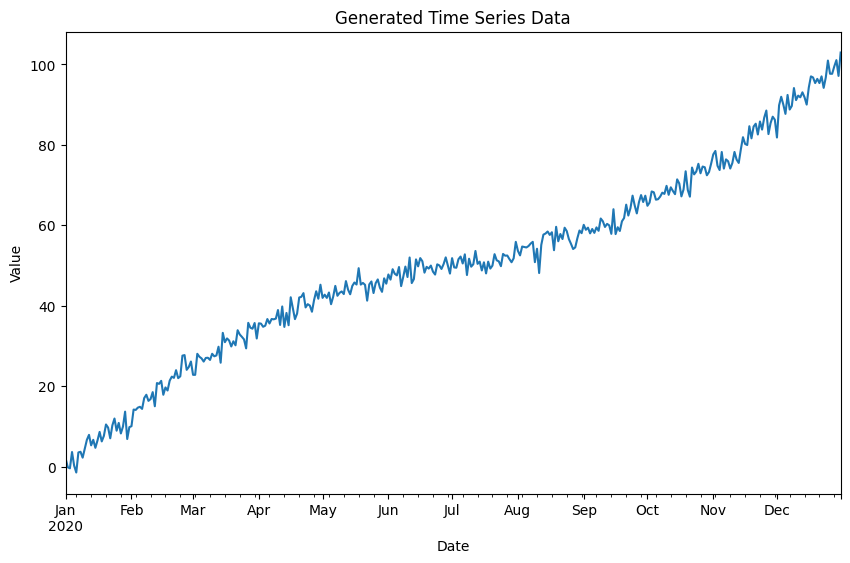

Missing values before cleaning: value    18
dtype: int64


<ipython-input-1-9f34623e4f61>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


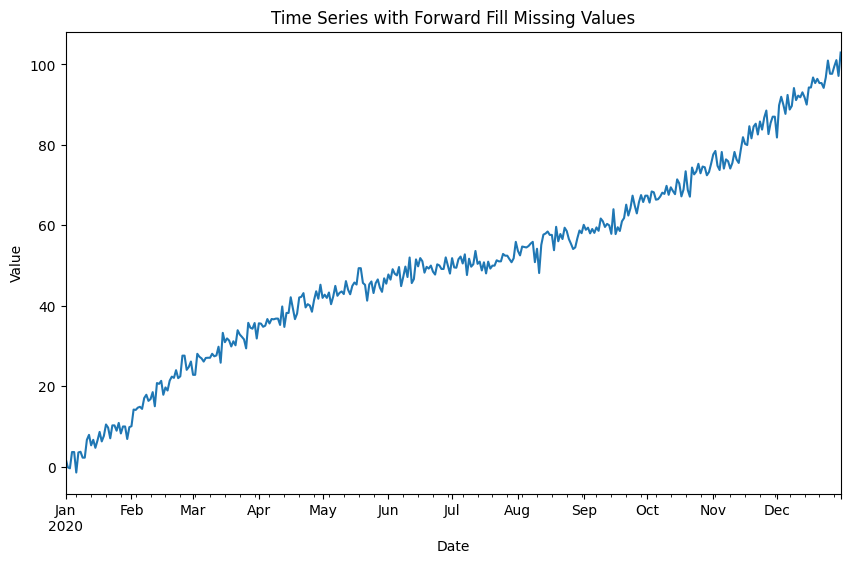

Missing values after cleaning: value    0
dtype: int64
Outliers detected:
Empty DataFrame
Columns: [value, zscore]
Index: []


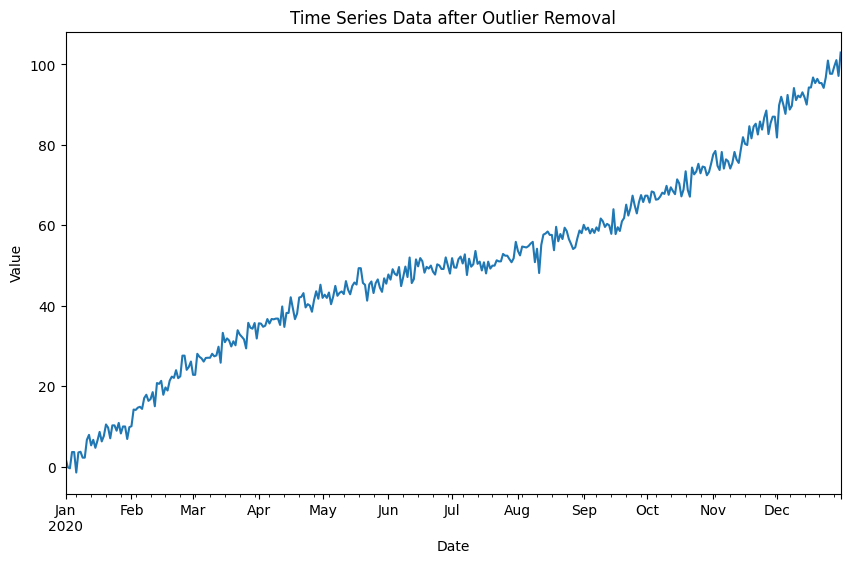

<ipython-input-1-9f34623e4f61>:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_cleaned.resample('M').mean()


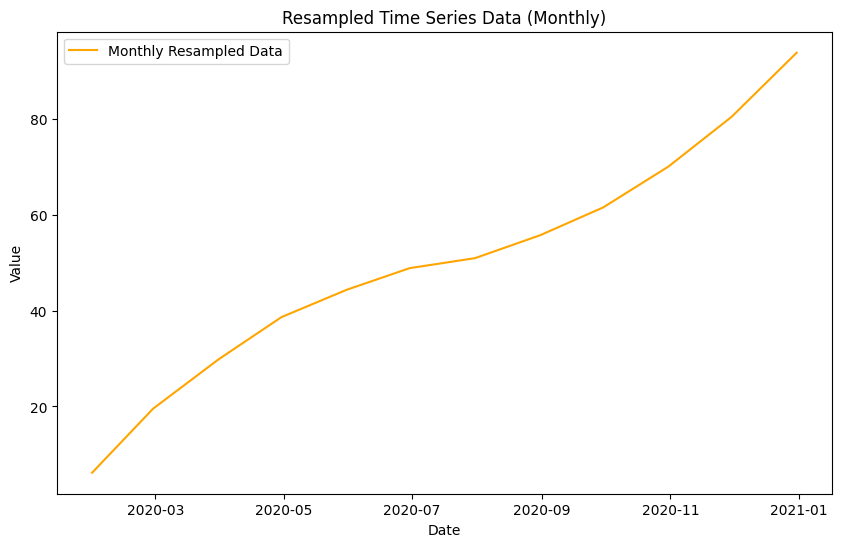

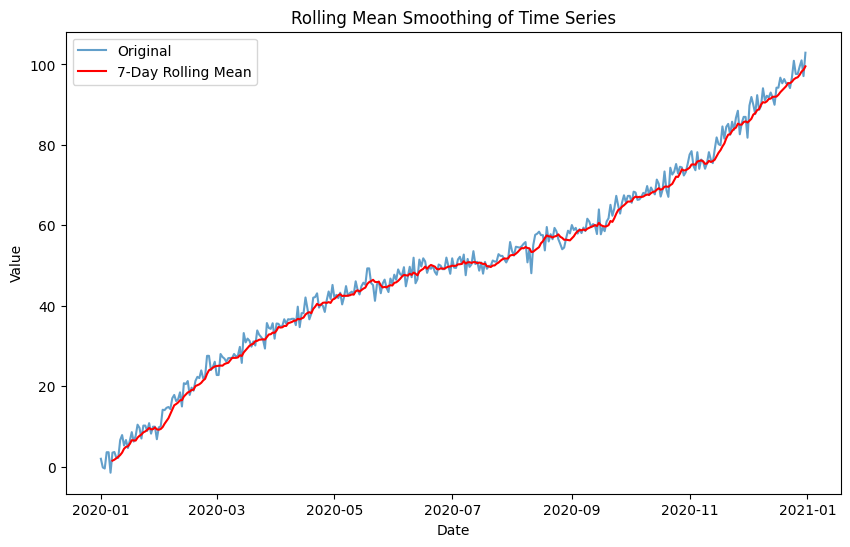

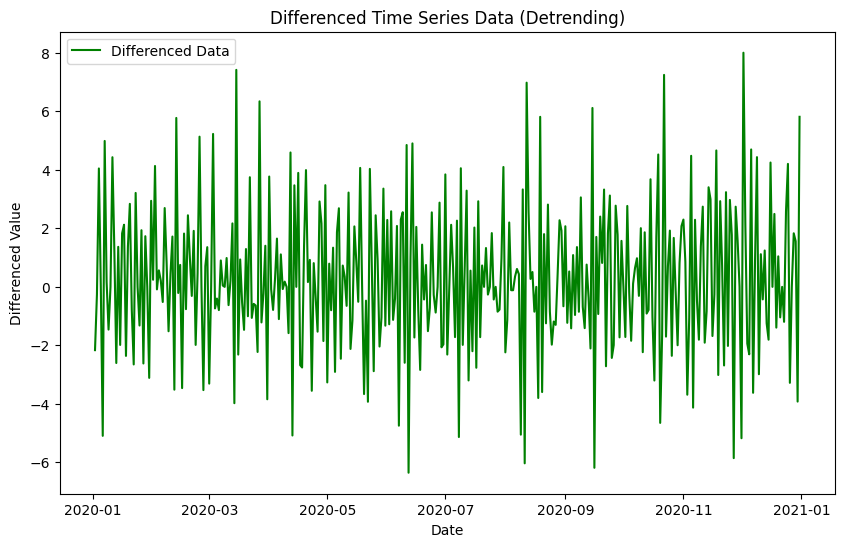

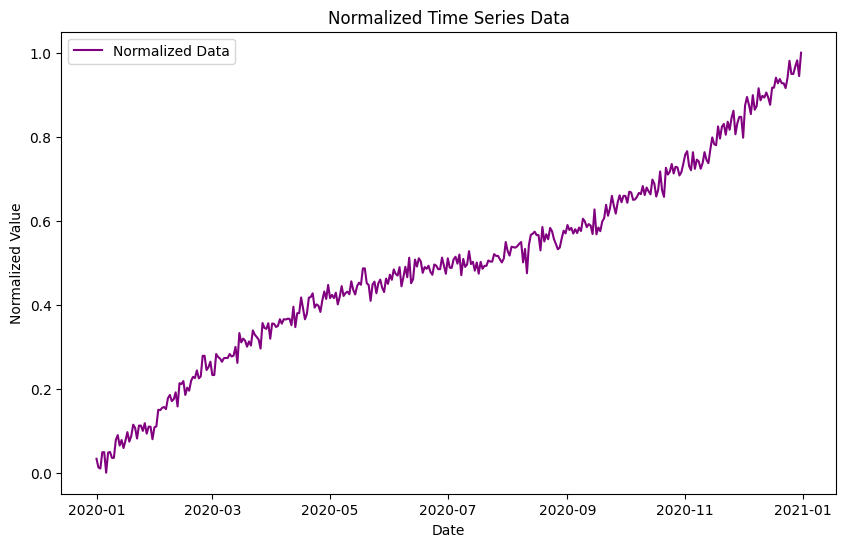

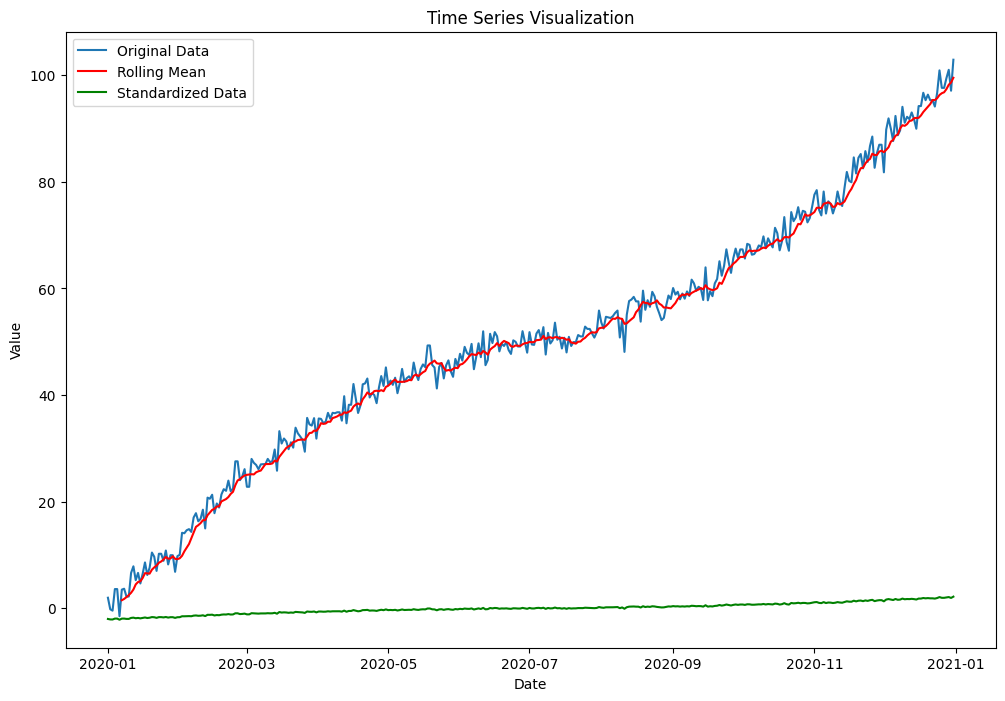

               value    zscore  rolling_mean  differenced  normalized  \
2020-01-01  1.986135 -1.994682           NaN          NaN    0.033211   
2020-01-02 -0.177089 -2.084357           NaN    -2.163224    0.012487   
2020-01-03 -0.435491 -2.095069           NaN    -0.258402    0.010012   
2020-01-04  3.612363 -1.927268           NaN     4.047854    0.048789   
2020-01-05  3.612363 -1.927268           NaN     0.000000    0.048789   

            standardized  
2020-01-01     -1.994682  
2020-01-02     -2.084357  
2020-01-03     -2.095069  
2020-01-04     -1.927268  
2020-01-05     -1.927268  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler

date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')

trend = np.linspace(0, 100, len(date_rng))
seasonality = 10 * np.sin(np.linspace(0, 3.14 * 2, len(date_rng)))
noise = np.random.normal(0, 2, len(date_rng))
data = trend + seasonality + noise
df = pd.DataFrame(data, columns=['value'], index=date_rng)

df['value'].plot(figsize=(10, 6))
plt.title('Generated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

df.loc[df.sample(frac=0.05).index, 'value'] = np.nan

print("Missing values before cleaning:", df.isna().sum())

df_filled = df.fillna(method='ffill')

df_filled['value'].plot(figsize=(10, 6))
plt.title('Time Series with Forward Fill Missing Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

print("Missing values after cleaning:", df_filled.isna().sum())

df_filled['zscore'] = zscore(df_filled['value'])

outliers = df_filled[df_filled['zscore'].abs() > 3]
print("Outliers detected:")
print(outliers)

df_cleaned = df_filled[df_filled['zscore'].abs() <= 3]

df_cleaned['value'].plot(figsize=(10, 6))
plt.title('Time Series Data after Outlier Removal')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

df_monthly = df_cleaned.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['value'], label='Monthly Resampled Data', color='orange')
plt.title('Resampled Time Series Data (Monthly)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
df_cleaned['rolling_mean'] = df_cleaned['value'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index, df_cleaned['value'], label='Original', alpha=0.7)
plt.plot(df_cleaned.index, df_cleaned['rolling_mean'], label='7-Day Rolling Mean', color='red')
plt.title('Rolling Mean Smoothing of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

df_cleaned['differenced'] = df_cleaned['value'].diff()

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index, df_cleaned['differenced'], label='Differenced Data', color='green')
plt.title('Differenced Time Series Data (Detrending)')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

scaler_minmax = MinMaxScaler()
df_cleaned['normalized'] = scaler_minmax.fit_transform(df_cleaned[['value']])

scaler_standard = StandardScaler()
df_cleaned['standardized'] = scaler_standard.fit_transform(df_cleaned[['value']])

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index, df_cleaned['normalized'], label='Normalized Data', color='purple')
plt.title('Normalized Time Series Data')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()
plt.figure(figsize=(12, 8))
plt.plot(df_cleaned.index, df_cleaned['value'], label='Original Data')
plt.plot(df_cleaned.index, df_cleaned['rolling_mean'], label='Rolling Mean', color='red')
plt.plot(df_cleaned.index, df_cleaned['standardized'], label='Standardized Data', color='green')
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print(df_cleaned.head())
